<a href="https://colab.research.google.com/github/suravipanigrahi22/Gene_Quest/blob/main/UBQLN2_Bio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython



   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.3/3.3 MB 39.2 MB/s eta 0:00:00


Downloaded AlphaFold structure for Q9UHD9

Total amino acids in Q9UHD9: 624

Top 10 amino acids:
SER (Serine): 67
PRO (Proline): 65
GLN (Glutamine): 63
ALA (Alanine): 57
LEU (Leucine): 53
GLY (Glycine): 52
THR (Threonine): 44
ASN (Asparagine): 41
ILE (Isoleucine): 34
MET (Methionine): 31


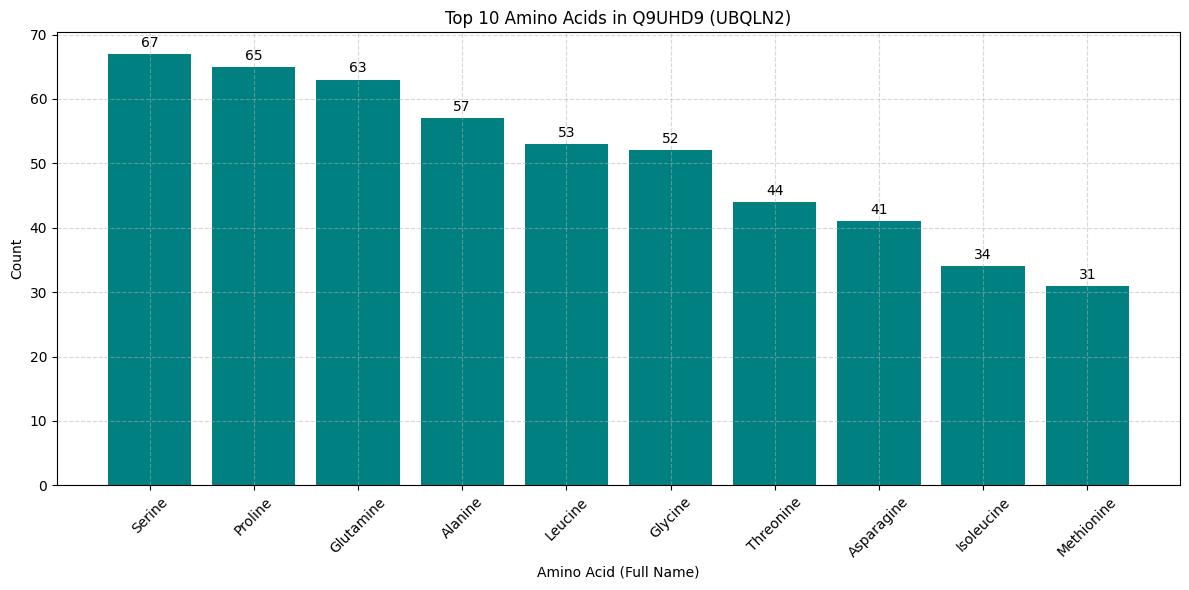


Sequence length: 624 bases

Nucleotide content:
A: 57 (37.25%)
T: 44 (28.76%)
G: 52 (33.99%)
C: 0 (0.00%)
AT content: 101 (66.01%)
GC content: 52 (33.99%)


In [ ]:
# Install Biopython (if not already installed)
# !pip install biopython

from Bio.PDB import PDBParser
from collections import Counter
import requests
import matplotlib.pyplot as plt

# Full names of amino acids
aa_full_names = {
    'ALA': 'Alanine', 'ARG': 'Arginine', 'ASN': 'Asparagine', 'ASP': 'Aspartic Acid',
    'CYS': 'Cysteine', 'GLN': 'Glutamine', 'GLU': 'Glutamic Acid', 'GLY': 'Glycine',
    'HIS': 'Histidine', 'ILE': 'Isoleucine', 'LEU': 'Leucine', 'LYS': 'Lysine',
    'MET': 'Methionine', 'PHE': 'Phenylalanine', 'PRO': 'Proline', 'SER': 'Serine',
    'THR': 'Threonine', 'TRP': 'Tryptophan', 'TYR': 'Tyrosine', 'VAL': 'Valine'
}

def download_af_model(uniprot_id):
    url = f"https://alphafold.ebi.ac.uk/files/AF-{uniprot_id}-F1-model_v4.pdb"
    response = requests.get(url)
    if response.status_code == 200:
        filename = f"AF-{uniprot_id}-F1-model_v4.pdb"
        with open(filename, "wb") as f:
            f.write(response.content)
        print(f"Downloaded AlphaFold structure for {uniprot_id}")
        return filename
    else:
        print(f"No structure found for UniProt ID: {uniprot_id}")
        return None

def get_gene_sequence(uniprot_id):
    url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.fasta?format=fasta&includeIsoform=true"
    response = requests.get(url)
    if response.status_code == 200:
        fasta_data = response.text
        lines = fasta_data.strip().split('\n')
        seq = ''.join(lines[1:]).upper()
        return seq
    else:
        print(f"Could not fetch DNA/protein sequence for {uniprot_id}")
        return None

# --- MAIN EXECUTION FOR UBQLN2 ---
uniprot_id = "Q9UHD9"  # UBQLN2

# Download and analyze protein structure
pdb_file = download_af_model(uniprot_id)
if pdb_file:
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure(uniprot_id, pdb_file)

    amino_acids = []
    for model in structure:
        for chain in model:
            for residue in chain:
                if residue.get_id()[0] == " ":
                    amino_acids.append(residue.get_resname())

    total_count = len(amino_acids)
    print(f"\nTotal amino acids in {uniprot_id}: {total_count}")

    aa_counts = Counter(amino_acids)
    print("\nTop 10 amino acids:")
    for aa, count in aa_counts.most_common(10):
        full_name = aa_full_names.get(aa, aa)
        print(f"{aa} ({full_name}): {count}")

    # Bar Plot
    top_aa = aa_counts.most_common(10)
    labels = [aa_full_names.get(aa, aa) for aa, _ in top_aa]
    values = [count for _, count in top_aa]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(labels, values, color='teal')
    plt.title(f"Top 10 Amino Acids in {uniprot_id} (UBQLN2)")
    plt.xlabel("Amino Acid (Full Name)")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)

    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Fetch and analyze DNA/protein sequence
sequence = get_gene_sequence(uniprot_id)
if sequence:
    print(f"\nSequence length: {len(sequence)} bases")
    base_counts = Counter(base for base in sequence if base in "ATGC")
    a = base_counts.get('A', 0)
    t = base_counts.get('T', 0)
    g = base_counts.get('G', 0)
    c = base_counts.get('C', 0)
    total = a + t + g + c

    if total > 0:
        print(f"\nNucleotide content:")
        print(f"A: {a} ({(a/total)*100:.2f}%)")
        print(f"T: {t} ({(t/total)*100:.2f}%)")
        print(f"G: {g} ({(g/total)*100:.2f}%)")
        print(f"C: {c} ({(c/total)*100:.2f}%)")
        print(f"AT content: {a+t} ({((a+t)/total)*100:.2f}%)")
        print(f"GC content: {g+c} ({((g+c)/total)*100:.2f}%)")
    else:
        print("The sequence might be a protein, not a DNA sequence.")



In [ ]:
import requests

def print_cadd_interpretation_table():
    """
    Prints a nicely formatted interpretation table explaining CADD Phred score ranges.
    This table helps users understand whether a variant is likely benign, possibly
    deleterious, or likely pathogenic based on the CADD Phred score.
    """
    print("\nCADD Phred Score Interpretation Guide:")
    print("=" * 50)
    print("{:<15} | {:<30}".format("Score Range", "Interpretation"))
    print("=" * 50)
    print("{:<15} | {:<30}".format("< 10", "Likely benign or tolerated (low impact)"))
    print("{:<15} | {:<30}".format("10 - 20", "Possibly deleterious (moderate impact)"))
    print("{:<15} | {:<30}".format("> 20", "Likely deleterious/pathogenic (high impact)"))
    print("=" * 50)
    print("Note: Higher score means higher likelihood of pathogenicity.\n")

def interpret_cadd_score(score):
    """
    Provides a simple textual interpretation based on the CADD Phred score.
    Args:
        score (float): The CADD Phred score of the variant.
    Returns:
        str: Interpretation string indicating likely impact of variant.
    """
    if score < 10:
        return "Likely benign or tolerated variant (low impact)."
    elif 10 <= score <= 20:
        return "Possibly deleterious variant (moderate impact)."
    else:
        return "Likely deleterious/pathogenic variant (high impact)."

def get_cadd_score(chrom, pos, ref, alt, cadd_version="GRCh38-v1.7"):
    """
    Fetches the CADD Phred score for a given genomic variant from the CADD API.

    Args:
        chrom (str): Chromosome number or letter (e.g., 'X').
        pos (int): Genomic coordinate position (1-based).
        ref (str): Reference nucleotide allele.
        alt (str): Alternate nucleotide allele.
        cadd_version (str): Version of the CADD dataset to query (default "GRCh38-v1.7").

    Returns:
        float or None: The CADD Phred score if available; None if not found or error occurs.
    """
    # Construct API URL to fetch variant data
    api_url = f"https://cadd.gs.washington.edu/api/v1.0/{cadd_version}/{chrom}:{pos}_{ref}_{alt}"
    print(f"Fetching CADD score from: {api_url}")

    try:
        # Send GET request to CADD API
        response = requests.get(api_url)
        response.raise_for_status()  # Raise exception for HTTP errors

        data = response.json()  # Parse JSON response

        if data:
            # Extract PHRED score from the first item returned
            variant_data = data[0]
            return float(variant_data.get("PHRED", None))
        else:
            print(f"No data found for variant {chrom}:{pos}_{ref}_{alt}.")
            return None

    except requests.exceptions.RequestException as e:
        # Handle network or API errors gracefully
        print(f"Error fetching data: {e}")
        return None

def main():
    """
    Main function to drive the UBQLN2 Variant CADD Score Fetcher program.
    It:
      - Welcomes the user and explains what inputs are required.
      - Shows a table interpreting CADD scores.
      - Accepts multiple variant inputs.
      - Fetches and displays CADD scores along with interpretation.
      - Suggests manual lookup if no score is found.
      - Identifies the variant with the highest predicted pathogenicity.
    """
    print("--- UBQLN2 Variant CADD Score Fetcher ---")
    print("Provide chromosome, position, reference allele, and alternate allele for UBQLN2 variants.")
    print("You can find these details on ClinVar, NCBI, or Ensembl for UBQLN2 gene (chrX: positions ~153,700,000+).")
    print("-" * 60)

    # Print interpretation guide once at program start
    print_cadd_interpretation_table()

    # Ask user how many variants they want to check
    while True:
        try:
            num_variants = int(input("How many UBQLN2 variants do you want to check? "))
            if num_variants > 0:
                break
            else:
                print("Enter a positive number.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

    variants = []
    for i in range(num_variants):
        print(f"\nEnter details for Variant {i+1}:")
        chrom = input("Chromosome (usually 'X' for UBQLN2): ").strip()
        pos = input("Position (genomic coordinate): ").strip()
        ref = input("Reference Allele (A, T, C, G): ").strip().upper()
        alt = input("Alternate Allele (A, T, C, G): ").strip().upper()

        # Validate inputs are not empty
        if not all([chrom, pos, ref, alt]):
            print("All inputs are required, skipping this variant.")
            continue

        # Convert position to int and validate
        try:
            pos = int(pos)
        except ValueError:
            print("Position must be a number, skipping this variant.")
            continue

        # Store variant info for processing
        variants.append({
            "chrom": chrom,
            "pos": pos,
            "ref": ref,
            "alt": alt,
            "cadd_score": None
        })

    print("\n--- Fetching CADD Phred Scores ---")
    for idx, var in enumerate(variants):
        print(f"\nVariant {idx+1}: Chr={var['chrom']}, Pos={var['pos']}, Ref={var['ref']}, Alt={var['alt']}")
        score = get_cadd_score(var['chrom'], var['pos'], var['ref'], var['alt'])
        var["cadd_score"] = score

        if score is not None:
            # Show fetched score and its interpretation
            print(f"  ‚úÖ CADD Phred Score: {score:.3f} (higher = more likely deleterious)")
            print(f"  üîç Interpretation: {interpret_cadd_score(score)}")
        else:
            # Guide user to manual lookup if API returns no data
            print("  ‚ö†Ô∏è No CADD score retrieved via API.")
            print("  Please check manually here: https://cadd.gs.washington.edu/snv")

    print("\n--- Variant Comparison ---")
    # Filter out variants with valid scores only
    scored_vars = [v for v in variants if v["cadd_score"] is not None]

    if scored_vars:
        # Find variant with highest predicted pathogenicity (highest score)
        max_var = max(scored_vars, key=lambda x: x["cadd_score"])
        print(f"\nMost likely pathogenic variant based on CADD score:")
        print(f"  Chr: {max_var['chrom']}")
        print(f"  Pos: {max_var['pos']}")
        print(f"  Ref: {max_var['ref']}")
        print(f"  Alt: {max_var['alt']}")
        print(f"  CADD Phred Score: {max_var['cadd_score']:.3f}")
        print(f"  Interpretation: {interpret_cadd_score(max_var['cadd_score'])}")
    else:
        print("No valid CADD scores to compare.")

    print("\n--- Done ---")

if __name__ == "__main__":
    main()


--- UBQLN2 Variant CADD Score Fetcher ---
Provide chromosome, position, reference allele, and alternate allele for UBQLN2 variants.
You can find these details on ClinVar, NCBI, or Ensembl for UBQLN2 gene (chrX: positions ~153,700,000+).
------------------------------------------------------------

CADD Phred Score Interpretation Guide:
Score Range     | Interpretation                
< 10            | Likely benign or tolerated (low impact)
10 - 20         | Possibly deleterious (moderate impact)
> 20            | Likely deleterious/pathogenic (high impact)
Note: Higher score means higher likelihood of pathogenicity.

How many UBQLN2 variants do you want to check? 2

Enter details for Variant 1:
Chromosome (usually 'X' for UBQLN2): X
Position (genomic coordinate): 153735200 
Reference Allele (A, T, C, G): G
Alternate Allele (A, T, C, G): A

Enter details for Variant 2:
Chromosome (usually 'X' for UBQLN2): X
Position (genomic coordinate): 153735123
Reference Allele (A, T, C, G): C
Alter

In [4]:
import requests
import time
import matplotlib.pyplot as plt
from tabulate import tabulate
from tqdm import tqdm

def interpret_gnomad_af(af):
    if af is None:
        return "No data"
    elif af < 0.01:
        return "Rare (possibly pathogenic)"
    elif af < 0.05:
        return "Low freq (uncertain)"
    else:
        return "Common (likely benign)"

def fetch_region_variants():
    url = "https://rest.ensembl.org/overlap/region/human/X:56565000-56570000?feature=variation"
    r = requests.get(url, headers={"Content-Type": "application/json"})
    r.raise_for_status()
    return r.json()

def fetch_gnomad_af(variant_id):
    url = f"https://rest.ensembl.org/variation/human/{variant_id}?content-type=application/json"
    r = requests.get(url)
    if r.status_code != 200:
        return None
    data = r.json()
    for pop in data.get("population_genotypes", []):
        if "gnomAD" in pop.get("population", "") and pop.get("frequency"):
            return pop["frequency"]
    return None

def plot_af_bar(af_data):
    labels = [row["variant"] for row in af_data]
    afs = [row["af"] for row in af_data]

    plt.figure(figsize=(10, 5))
    plt.bar(labels, afs, color='skyblue')
    plt.xlabel("Variant ID")
    plt.ylabel("Allele Frequency")
    plt.title("gnomAD Allele Frequencies")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def main():
    print("üìä gnomAD Variant AF Tool (UBQLN2 gene region)")
    print("‚ÑπÔ∏è  gnomAD = Genome Aggregation Database (population allele frequency)\n")

    all_variants = fetch_region_variants()
    variant_ids = [v["id"] for v in all_variants if v.get("id")]
    print(f"‚úÖ Total variants fetched: {len(variant_ids)}")
    print("‚è≥ Filtering variants with valid gnomAD AF (this may take ~30 seconds)...")

    af_variants = []
    for vid in tqdm(variant_ids[:250]):  # Limit to first 250 for speed
        af = fetch_gnomad_af(vid)
        time.sleep(0.3)
        if af is not None:
            af_variants.append({"variant": vid, "af": af})

    if not af_variants:
        print("\n‚ùå No variants with gnomAD AF found. Try increasing scan range.")
        return

    print(f"\n‚úÖ Found {len(af_variants)} variants with gnomAD AF.\n")

    # Show top 10 to pick from
    print("üßæ Variants with valid AF:")
    for i, v in enumerate(af_variants[:10], 1):
        print(f"{i}. {v['variant']} ‚Äî AF = {v['af']:.6f}")

    user_input = input("\nüî¢ Enter comma-separated numbers of variants to show in detail (e.g., 1,3,5): ")
    try:
        selected_indexes = [int(i.strip()) - 1 for i in user_input.split(",")]
    except ValueError:
        print("‚ùå Invalid input. Use numbers only.")
        return

    selected = [af_variants[i] for i in selected_indexes if 0 <= i < len(af_variants)]
    for row in selected:
        row["category"] = interpret_gnomad_af(row["af"])

    if selected:
        print("\nüìã Summary Table:")
        print(tabulate(selected, headers="keys", floatfmt=".6f"))
        plot_af_bar(selected)
    else:
        print("‚ö†Ô∏è No valid selections.")

if __name__ == "__main__":
    main()


üìä gnomAD Variant AF Tool (UBQLN2 gene region)
‚ÑπÔ∏è  gnomAD = Genome Aggregation Database (population allele frequency)

‚úÖ Total variants fetched: 1563
‚è≥ Filtering variants with valid gnomAD AF (this may take ~30 seconds)...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 250/250 [02:52<00:00,  1.45it/s]


‚ùå No variants with gnomAD AF found. Try increasing scan range.


# New Section